In [77]:
import pandas as pd
# Load datasets
macro_data = pd.read_csv("../data/processed_data/macro_economic.csv")
events_Holidays_data = pd.read_csv("../data/processed_data/events_Holidays_data.csv")
weather_data = pd.read_csv("../data/processed_data/weather_data.csv")
train_data = pd.read_csv("../data/processed_data/train.csv")
test_data = pd.read_csv("../data/processed_data/Submission.csv")

In [80]:
macro_data.columns
events_Holidays_data.columns
weather_data.columns
train_data.columns
test_data.columns

Index(['Year', 'Month', 'ProductCategory', 'Unnamed: 3',
       'Sales(In ThousandDollars)'],
      dtype='object')

Train Data Overview:
   Year  Month ProductCategory  Sales(In ThousandDollars)
0  2009      1   WomenClothing                     1755.0
1  2009      1     MenClothing                      524.0
2  2009      1   OtherClothing                      936.0
3  2009      2   WomenClothing                     1729.0
4  2009      2     MenClothing                      496.0


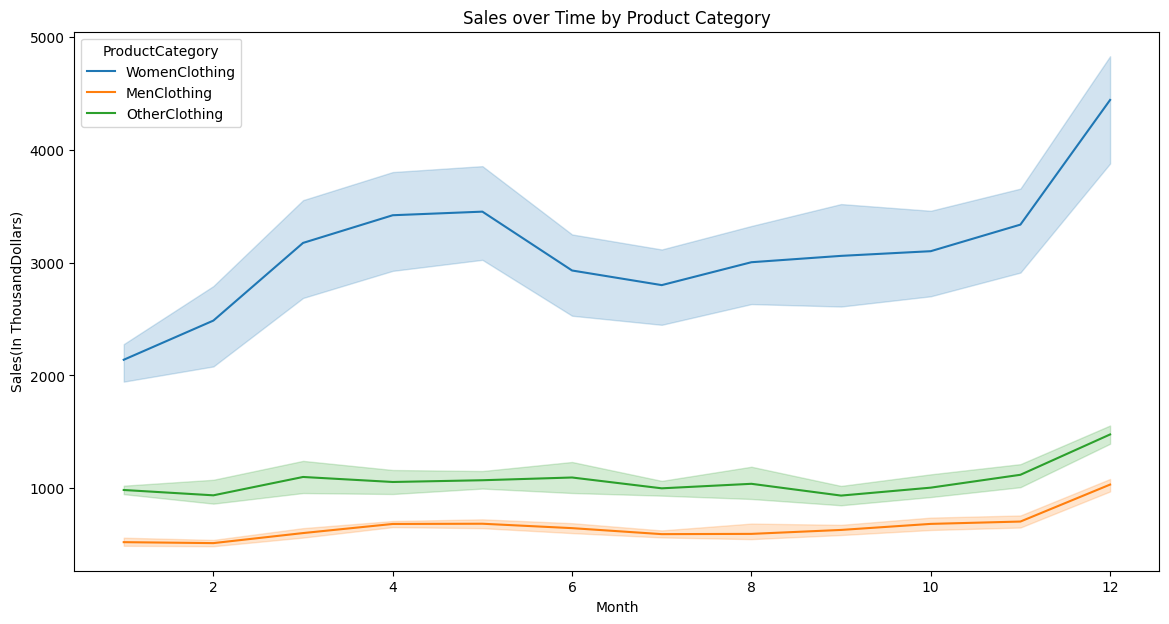

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import minmax_scaling
# import tensorflow as tf
# Exploratory Data Analysis (EDA)
print("Train Data Overview:")
print(train_data.head())
# Visualize sales over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=train_data, x='Month', y='Sales(In ThousandDollars)', hue='ProductCategory')
plt.title('Sales over Time by Product Category')
plt.show()

In [62]:
macro_data.head()

,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
0,2009 - Jan,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,11.44,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550
1,2009 - Feb,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,11.05,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100
2,2009 - Mar,14340.701639,14351.786822,235.067,Democrats,8.7,12.97,11.05,22.22,?,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650
3,2009 - Apr,14326.815525,14351.601731,235.582,Democrats,9.0,12.97,11.05,22.13,214,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225
4,2009 - May,14345.904809,14368.123959,235.975,Democrats,9.4,13.32,11.25,22.04,?,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300


In [63]:
events_Holidays_data.head()

,Year,MonthDate,Event,DayCategory
0,2009,2001-01-01,New Year's Day,Federal Holiday
1,2009,2019-01-01,Martin Luther King Jr. Day,Federal Holiday
2,2009,2014-02-01,Valentine's Day,Event
3,2009,2016-02-01,Presidents' Day,Federal Holiday
4,2009,2012-04-01,Easter Sunday,Event


In [64]:
events_Holidays_data.isnull().sum()

Year           0
MonthDate      0
Event          0
DayCategory    0
dtype: int64

In [8]:
weather_data.head()

,Year,Month,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,...,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
0,2009,Jan,1,-3,-6,-9,-16,-17,-19,54,...,1023,1015,16,16,16,37,18,60,0,NaN
1,2009,Jan,2,1,-2,-5,-3,-7,-17,78,...,1012,1007,16,13,2,27,10,48,T,Snow
2,2009,Jan,3,3,1,-2,-5,-9,-13,72,...,1015,1008,16,16,16,27,16,42,T,NaN
3,2009,Jan,4,6,1,-4,-10,-12,-13,55,...,1017,1015,16,16,16,32,12,40,0,NaN
4,2009,Jan,5,6,5,3,-1,-5,-16,62,...,1014,1013,16,16,16,23,11,34,T,NaN


In [65]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Year                         365 non-null    int64 
 1   Month                        365 non-null    object
 2   Day                          365 non-null    int64 
 3   Temp high (°C)               365 non-null    int64 
 4   Temp avg (°C)                365 non-null    int64 
 5   Temp low (°C)                365 non-null    int64 
 6   Dew Point high (°C)          365 non-null    int64 
 7   Dew Point avg (°C)           365 non-null    int64 
 8   Dew Point low (°C)           365 non-null    int64 
 9   Humidity (%) high            365 non-null    int64 
 10  Humidity (%) avg             365 non-null    int64 
 11  Humidity (%) low             365 non-null    int64 
 12  Sea Level Press. (hPa) high  365 non-null    int64 
 13  Sea Level Press. (hPa) avg   365 no

In [42]:
weather_data.isnull().sum()

Year                             0
Month                            0
Day                              0
Temp high (°C)                   0
Temp avg (°C)                    0
Temp low (°C)                    0
Dew Point high (°C)              0
Dew Point avg (°C)               0
Dew Point low (°C)               0
Humidity (%) high                0
Humidity (%) avg                 0
Humidity (%) low                 0
Sea Level Press. (hPa) high      0
Sea Level Press. (hPa) avg       0
Sea Level Press. (hPa) low       0
Visibility (km) high             0
Visibility (km) avg              0
Visibility (km) low              0
Wind (km/h) low                  0
Wind (km/h) avg                  0
Wind (km/h) high                 0
Precip. (mm) sum                 0
WeatherEvent                   225
dtype: int64

In [79]:
print(weather_data.columns)

Index(['Year', 'Month', 'Day', 'Temp high (°C)', 'Temp avg (°C)',
       'Temp low (°C)', 'Dew Point high (°C)', 'Dew Point avg (°C)',
       'Dew Point low (°C)', 'Humidity (%) high', 'Humidity (%) avg',
       'Humidity (%) low', 'Sea Level Press. (hPa) high',
       'Sea Level Press. (hPa) avg', 'Sea Level Press. (hPa) low',
       'Visibility (km) high', 'Visibility (km) avg', 'Visibility (km) low',
       'Wind (km/h) low', 'Wind (km/h) avg', 'Wind (km/h) high',
       'Precip. (mm) sum', 'WeatherEvent'],
      dtype='object')


In [54]:
train_data.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


In [53]:
train_data.isna().sum()

Year                          0
Month                         0
ProductCategory               0
Sales(In ThousandDollars)    10
dtype: int64

In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       180 non-null    int64  
 1   Month                      180 non-null    int64  
 2   ProductCategory            180 non-null    object 
 3   Sales(In ThousandDollars)  170 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 5.8+ KB


In [51]:
test_data.head()

,Year,Month,ProductCategory,Unnamed: 3,Sales(In ThousandDollars)
0,2014,1,WomenClothing,NaN,NaN
1,2014,1,MenClothing,NaN,NaN
2,2014,1,OtherClothing,NaN,NaN
3,2014,2,WomenClothing,NaN,NaN
4,2014,2,MenClothing,NaN,NaN


In [72]:
test = test_data.iloc[:,0:3]
test

,Year,Month,ProductCategory
0,2014,1,WomenClothing
1,2014,1,MenClothing
2,2014,1,OtherClothing
3,2014,2,WomenClothing
4,2014,2,MenClothing
5,2014,2,OtherClothing
6,2014,3,WomenClothing
7,2014,3,MenClothing
8,2014,3,OtherClothing
9,2014,4,WomenClothing


In [66]:
test.isna().sum()

Year               0
Month              0
ProductCategory    0
dtype: int64

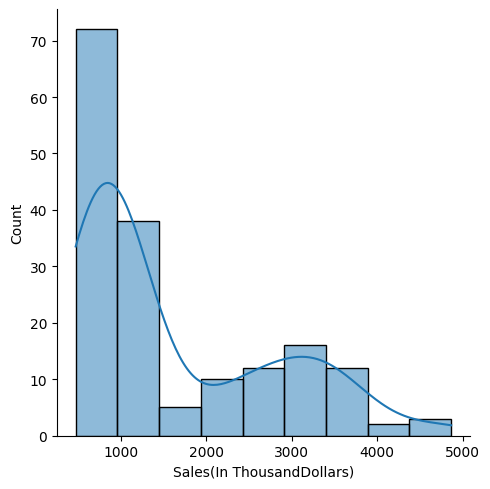

In [76]:
target = train_data.pop('Sales(In ThousandDollars)')

sns.displot(target, kde=True)